In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def generator_noisy_linear(parameters:tuple, n, sigma):
    x = [random.uniform(0,1) for _ in range(n)]
    x = np.array(x)
    
    eps = [random.gauss(0,sigma) for _ in range(n)]
    eps = np.array(eps)
    
    return x, parameters[0] + parameters[1]*x + eps, eps

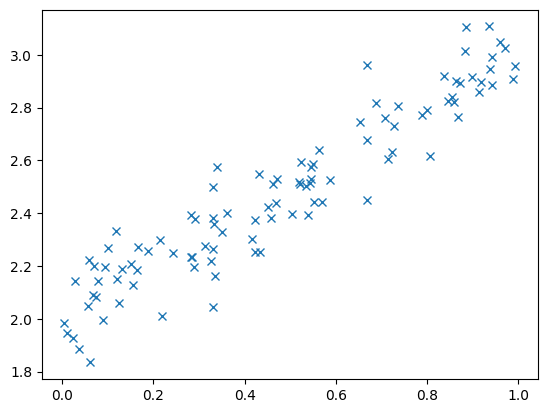

In [11]:
initial_beta = (2, 1)
n = 100
sigma = 0.1
dataset = generator_noisy_linear(initial_beta, n, sigma)
plt.plot(dataset[0], dataset[1], 'x')

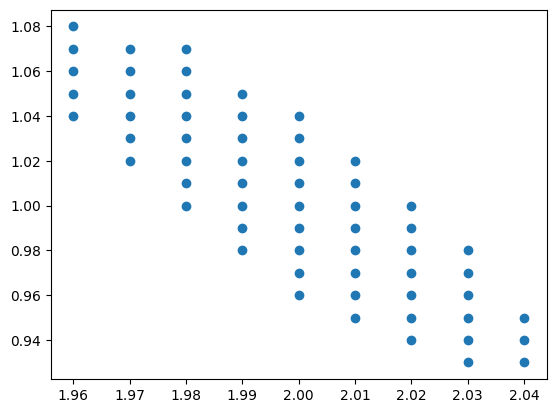

In [79]:
from scipy.stats import chi2


ones = np.ones_like(dataset[0])
ones = np.expand_dims(ones, axis=0)

X_T = np.expand_dims(dataset[0], axis=0)
X_T = np.concatenate((ones, X_T), axis=0)
X = np.transpose(X_T)

X_T0X = np.matmul(X_T, X)
X_T0y = np.matmul(X_T, dataset[1])

beta_hat = np.linalg.inv(X_T0X)@X_T0y

def quantile(r, n=2):
    chi_squared = chi2(n)
    return chi_squared.ppf(r)

def chi_2(beta_wave, beta_hat=beta_hat, X_T0X=X_T0X, sigma=sigma):
    return 1/sigma**2 * np.transpose(beta_wave - beta_hat)@X_T0X@(beta_wave - beta_hat)

def ellipsoid(r=0.95):
    _quantile = quantile(r)
    beta0 = np.arange(-3,3,0.01)
    beta1 = np.arange(-3,3,0.01)

    ellipsoid_x = np.zeros_like(beta0)
    ellipsoid_y = np.zeros_like(beta0)

    i = 0

    for _beta0 in beta0:
        for _beta1 in beta1:
            if chi_2(np.array([_beta0, _beta1])) < _quantile:
                ellipsoid_x[i], ellipsoid_y[i]  = _beta0, _beta1
                i += 1
    
    return ellipsoid_x, ellipsoid_y, i

x = ellipsoid()
i = x[2]
a = x[0][:i]
b = x[1][:i]

plt.scatter(a, b)

# print(chi_2(np.array([2,1])))
# print(quantile(0.5))
# x = np.arange(0,10,0.01)
# plt.plot(x, chi2(2).pdf(x))